# Capstone - Week 5 - part 2

## Paris -  Venues cluster


### Probleme behaviour

Paris (nicknamed the "City of light") is the capital city of France, and the largest city in France, Paris is also the center of French economy, politics, traffic and culture. Paris has many art museums(206) and historical buildings(2185). As a traffic center, Paris has a very good underground subway system (called the Metro),there are also 12,000 restaurants, 437 gardens.

The insights derived from analysis will give good understanding of the **tourism agency environment** which help in strategically targeting the market. This will help in reduction of risk. And the Return on Investment will be reasonable.

### Probleme description

As a tourism agency we need to know which neighberhood are the same to **optimise the customer journey** :
- select **days by venues theme** that maximise the number of sight seeing 
- making the trip more profitable for the customer and therefore for the agencies too. 
- to make the visit more coherent with the places visited 

### Target Audience


My Client is a tourism agency, so I will focus on Paris borough during my analysis. The objective is to determin the  4 types of  neighborhood of paris city . The Management also expects to understand the following points: 

- how many Boroughs and neighberhoods are in paris.
- how much venues are in each cluster.
- what are the particularities of each cluster.
- What are the best 5 cluster to visit as a tourist

This would interest anyone who wants to start an agency in Paris, and also someone how want to have a good journey in Paris.



## 1- importing the requered librarys

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from sklearn.cluster import KMeans

import matplotlib.cm as cm
import matplotlib.colors as colors


#!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt

#! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


## 2- data importing and description

### 2.1- the data for paris borough, Neighborhood, coordonates from the official web site of the Paris town :
https://opendata.paris.fr/explore/dataset/quartier_paris/information/

In [2]:
df=pd.read_csv("quartier_paris.csv",sep=";")

In [3]:
df.head()

N_SQ_QU  C_QU  C_QUINSEE            L_QU  C_AR    N_SQ_AR    PERIMETRE  \
0  750000021    21    7510601         Monnaie     6  750000006  2391.122818   
1  750000022    22    7510602           Odéon     6  750000006  3516.314464   
2  750000029    29    7510801  Champs-Elysées     8  750000008  5480.652870   
3  750000051    51    7511303  Maison-Blanche    13  750000013  6814.373288   
4  750000052    52    7511304     Croulebarbe    13  750000013  3289.230480   

        SURFACE                 Geometry X Y  \
0  2.933606e+05  48.8543844036,2.34003537113   
1  7.161484e+05  48.8478006293,2.33633882759   
2  1.140254e+06  48.8670744922,2.30865168468   
3  2.231506e+06  48.8231278057,2.35243314954   
4  6.920677e+05  48.8337336761,2.34767304607   

                                            Geometry  
0  {"type": "Polygon", "coordinates": [[[2.343168...  
1  {"type": "Polygon", "coordinates": [[[2.336988...  
2  {"type": "Polygon", "coordinates": [[[2.306463...  
3  {"type": "Polygon", "coordinates": [[[2.349115...  
4  {"type": "Polygon", "coordinates": [[[2.351662...

### 2.2- selecting the data that interest us:
 - **Geometry X Y**	: contain latitude and longitude of Neighborhood, we need to split this column into tow (longitude of latitude)
 - **L_QU** : contain the name of the Neighborhood
 - **C_AR** : containe the borough of each Neighborhood , you can check on the wiki page to know more about Paris :
 https://en.wikipedia.org/wiki/Quarters_of_Paris

In [4]:
df1=df[['L_QU','C_AR']]

In [5]:
df1['latitude']=df['Geometry X Y'].apply(lambda x : x.split(',')[0])
df1['longitude']=df['Geometry X Y'].apply(lambda x : x.split(',')[1])

<ipython-input-5-0dda3f2cf8d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['latitude']=df['Geometry X Y'].apply(lambda x : x.split(',')[0])
<ipython-input-5-0dda3f2cf8d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['longitude']=df['Geometry X Y'].apply(lambda x : x.split(',')[1])


### 2.3- Paris coordonates using geolocator

In [6]:
address = 'Paris'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


### 2.4- Making latitude and longitude float type

In [7]:
df1['latitude']=df1['latitude'].astype('float64')
df1['longitude']=df1['longitude'].astype('float64')
df1

<ipython-input-7-4e6c14395472>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['latitude']=df1['latitude'].astype('float64')
<ipython-input-7-4e6c14395472>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['longitude']=df1['longitude'].astype('float64')


L_QU  C_AR   latitude  longitude
0          Monnaie     6  48.854384   2.340035
1            Odéon     6  48.847801   2.336339
2   Champs-Elysées     8  48.867074   2.308652
3   Maison-Blanche    13  48.823128   2.352433
4      Croulebarbe    13  48.833734   2.347673
..             ...   ...        ...        ...
75    Clignancourt    18  48.891668   2.345979
76     Goutte-d'Or    18  48.892138   2.355536
77    Rochechouart     9  48.879812   2.344861
78           Bercy    12  48.835209   2.386210
79          Halles     1  48.862289   2.344899

[80 rows x 4 columns]

### 2.5- Neighborhood of paris on map

In [8]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df1['latitude'], df1['longitude'], df1['C_AR'], df1['L_QU']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### 2.6- Getting 30 first venues of each neighberhood on data frame
#### foursquare credentials

In [9]:
CLIENT_ID = '54KLDE4RKR1GUX2NM1CIRTXXZVQOEEHRBIPZ2WSI4JDJFRUB' # your Foursquare ID
CLIENT_SECRET = 'BHQIWNOEBWZQ2VLHADSC0YIKUUEHUO5YS4BFAKFP41URSI04' # your Foursquare Secret
ACCESS_TOKEN = 'YJSOHJD14FQFTQ0HDCSBPAS2SAUX3Z031NCH5YFDJCSWPN2K' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 30 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 54KLDE4RKR1GUX2NM1CIRTXXZVQOEEHRBIPZ2WSI4JDJFRUB
CLIENT_SECRET:BHQIWNOEBWZQ2VLHADSC0YIKUUEHUO5YS4BFAKFP41URSI04


### 2.7- getNearbyVenues function : make serach venues on each Neighborhood

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
paris_venues = getNearbyVenues(names=df1['L_QU'],
                                   latitudes=df1['latitude'],
                                   longitudes=df1['longitude']
                                  )

Monnaie
Odéon
Champs-Elysées
Maison-Blanche
Croulebarbe
Sainte-Avoie
Hôpital-Saint-Louis
Belleville
Ternes
Folie-Méricourt
Salpêtrière
Place-Vendôme
Combat
Charonne
Javel
Ecole-Militaire
Grenelle
Auteuil
Quinze-Vingts
Saint-Gervais
Saint-Thomas-d'Aquin
Porte-Saint-Denis
Saint-Germain-l'Auxerrois
Villette
Arts-et-Métiers
Archives
Faubourg-du-Roule
Arsenal
Jardin-des-Plantes
Porte-Saint-Martin
Roquette
Picpus
Plaisance
Invalides
Faubourg-Montmartre
Gaillon
Amérique
Saint-Merri
Notre-Dame
Gros-Caillou
Vivienne
Enfants-Rouges
Saint-Germain-des-Prés
Saint-Vincent-de-Paul
Saint-Ambroise
Bel-Air
Montparnasse
Plaine de Monceaux
Europe
Sainte-Marguerite
Parc-de-Montsouris
Saint-Lambert
Val-de-Grâce
Necker
Père-Lachaise
La Chapelle
Saint-Victor
Madeleine
Saint-Fargeau
Porte-Dauphine
Grandes-Carrières
Batignolles
Notre-Dame-des-Champs
Petit-Montrouge
Pont-de-Flandre
Muette
Chaillot
Epinettes
Sorbonne
Saint-Georges
Chaussée-d'Antin
Palais-Royal
Mail
Bonne-Nouvelle
Gare
Clignancourt
Goutte-d'Or
Roc

### 2.8- Our final dataframe contain the following data:

- paris Neighborhood
- Neighborhood Latitude	
- Neighborhood Longitude	
- Venue
- Venue Latitude	
- Venue Longitude	
- Venue Category


In [12]:
paris_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Monnaie              48.854384                2.340035   
1         Monnaie              48.854384                2.340035   
2         Monnaie              48.854384                2.340035   
3         Monnaie              48.854384                2.340035   
4         Monnaie              48.854384                2.340035   
...           ...                    ...                     ...   
2184       Halles              48.862289                2.344899   
2185       Halles              48.862289                2.344899   
2186       Halles              48.862289                2.344899   
2187       Halles              48.862289                2.344899   
2188       Halles              48.862289                2.344899   

                      Venue  Venue Latitude  Venue Longitude  \
0                 Chez Nous       48.855823         2.340271   
1          Chez Le Libanais       48.853285         2.341673   
2            Maison Sauvage       48.853744         2.337993   
3             Taschen Store       48.853750         2.338162   
4        Ze Kitchen Galerie       48.855101         2.341297   
...                     ...             ...              ...   
2184            Tir-Bouchon       48.864648         2.348728   
2185         Le Pot de Vins       48.864322         2.340193   
2186  Passage du Grand Cerf       48.864760         2.349486   
2187                   Grom       48.866055         2.347095   
2188         Sergeant Paper       48.860665         2.350435   

           Venue Category  
0                Wine Bar  
1     Lebanese Restaurant  
2       French Restaurant  
3               Bookstore  
4              Restaurant  
...                   ...  
2184    French Restaurant  
2185           Restaurant  
2186     Pedestrian Plaza  
2187       Ice Cream Shop  
2188          Art Gallery  

[2189 rows x 7 columns]

## 3- Data analyses

### 3.1- Groupe data by Neighborhood

In [13]:
df_Neighbor_grouped=paris_venues.groupby('Neighborhood').count().reset_index()


(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 8 Text major ticklabel objects>)

<Figure size 2160x1440 with 0 Axes>

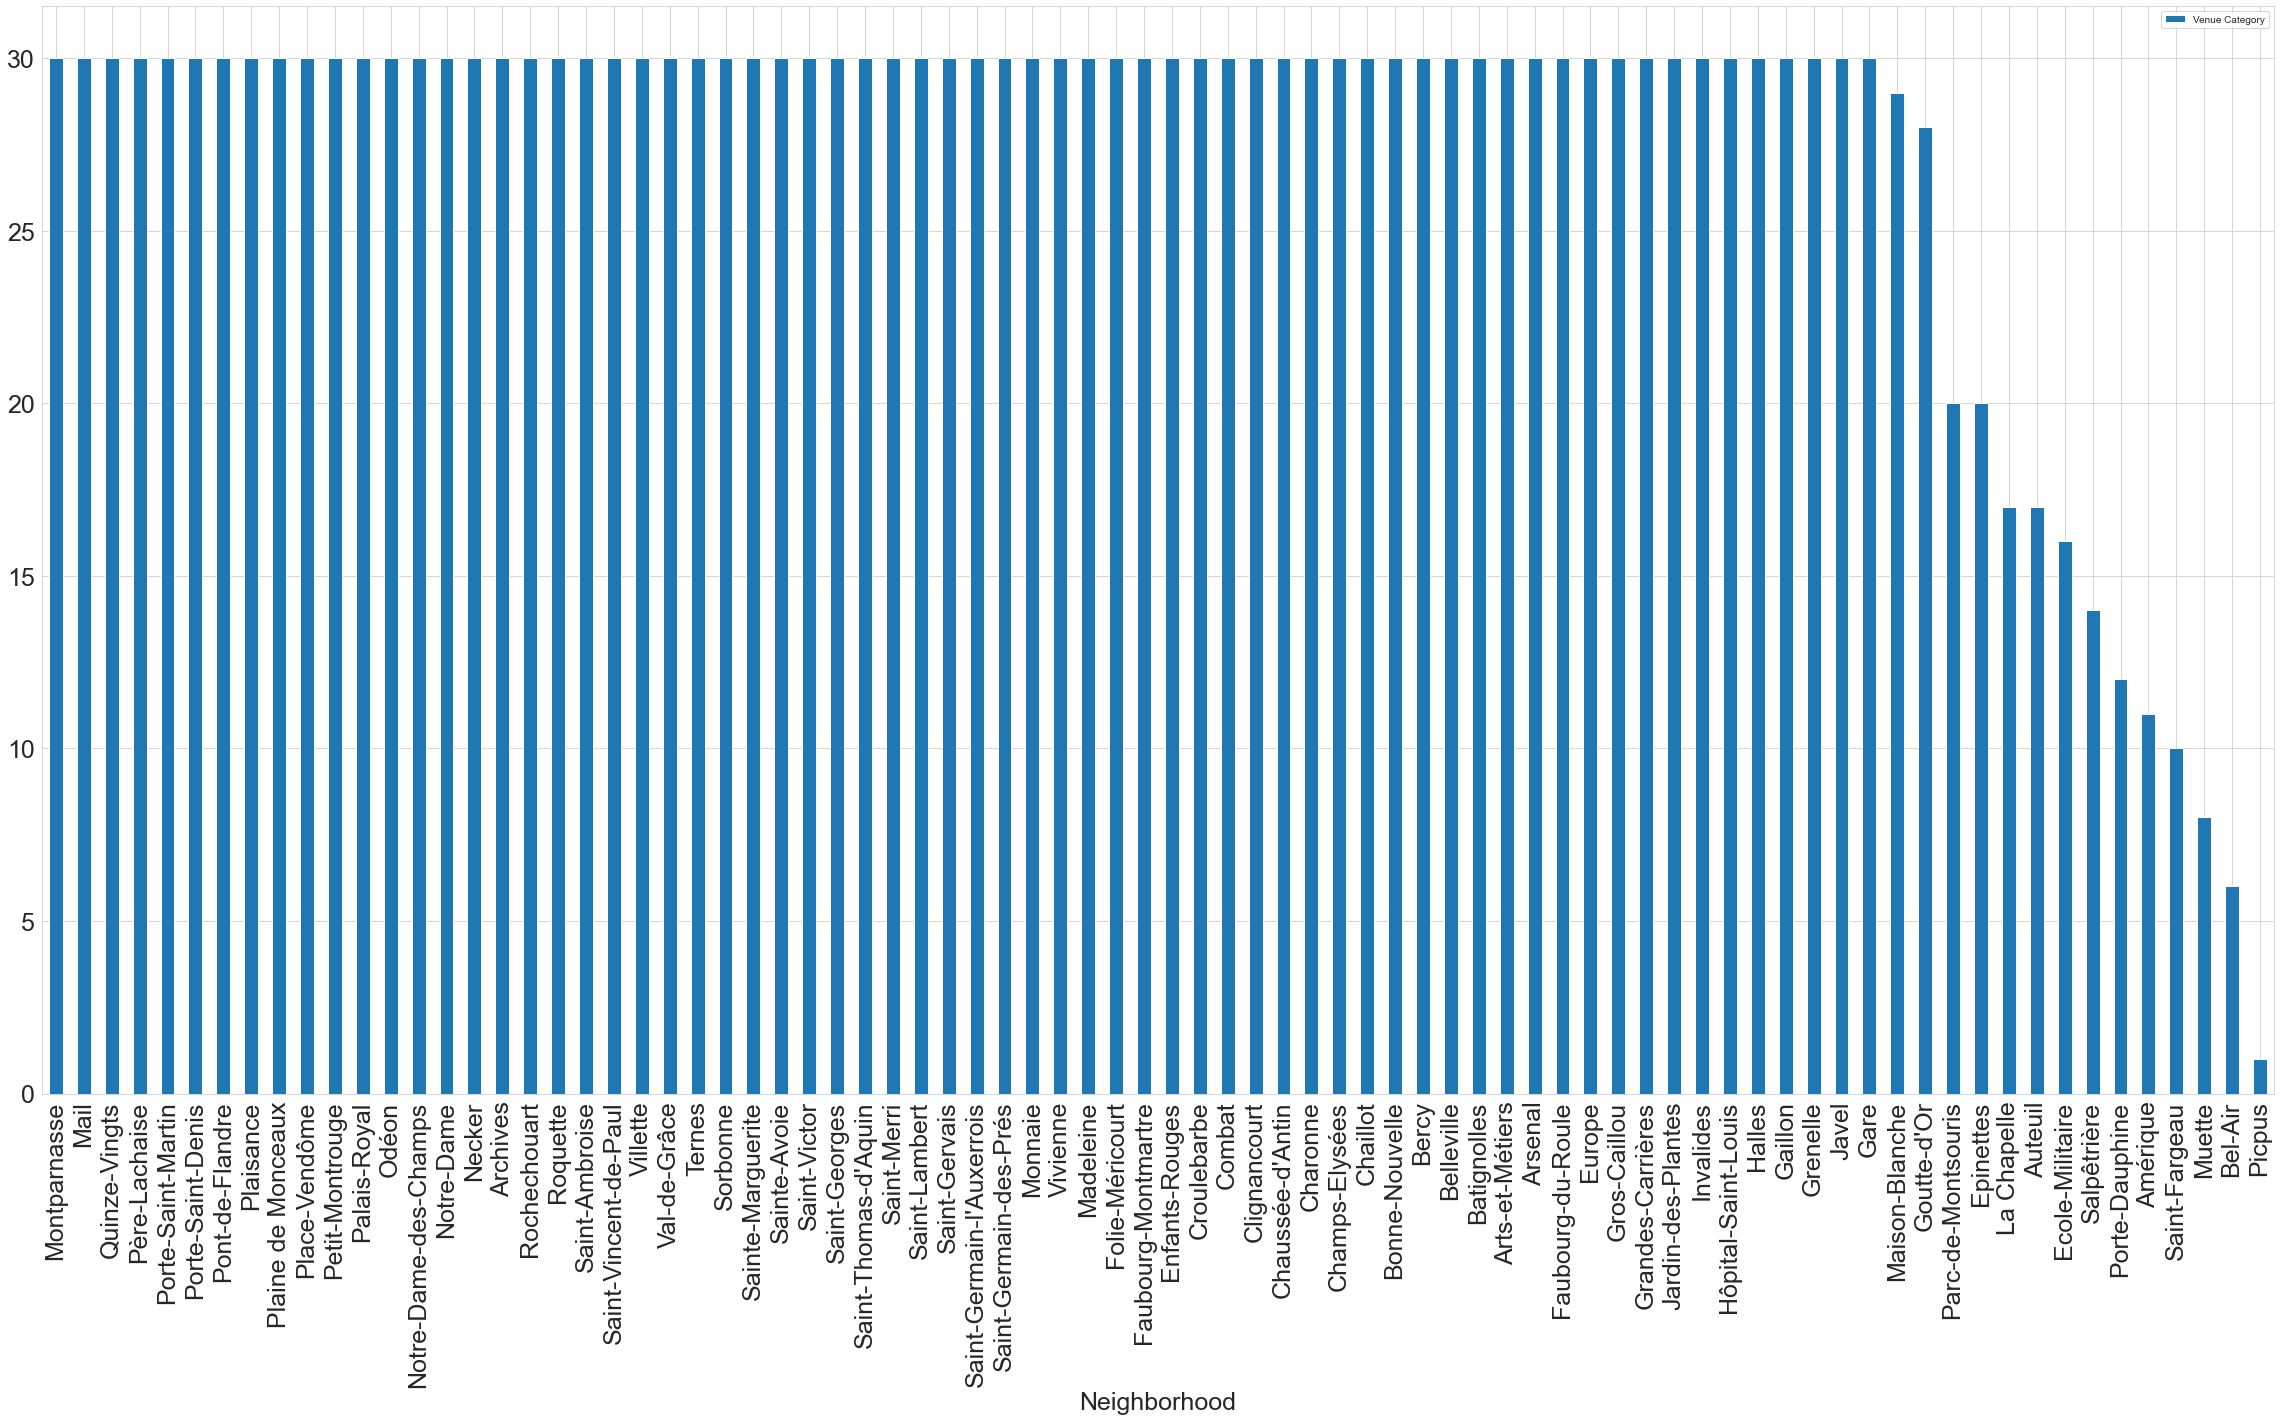

In [14]:
import seaborn as sns
sns.set_style("whitegrid")
figure=plt.figure(figsize=(30,20))
df_Neighbor_grouped.sort_values(by='Venue Category',ascending=False).plot.bar(x='Neighborhood',y='Venue Category',figsize=(40,20))
plt.xlabel("Neighborhood",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

 - There are 30 venues for each Neighborhood exept 12 of them , this because they are small ones.
 - the data are consistent across the rest of the neighbourhoods.


### 3.2- Group data by Venues cathegory

In [15]:
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 242 uniques categories.


In [16]:
df_categ_grouped=paris_venues.groupby('Venue Category').count().reset_index().sort_values(by='Neighborhood',ascending=False)


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text major ticklabel objects>)

<Figure size 2160x1440 with 0 Axes>

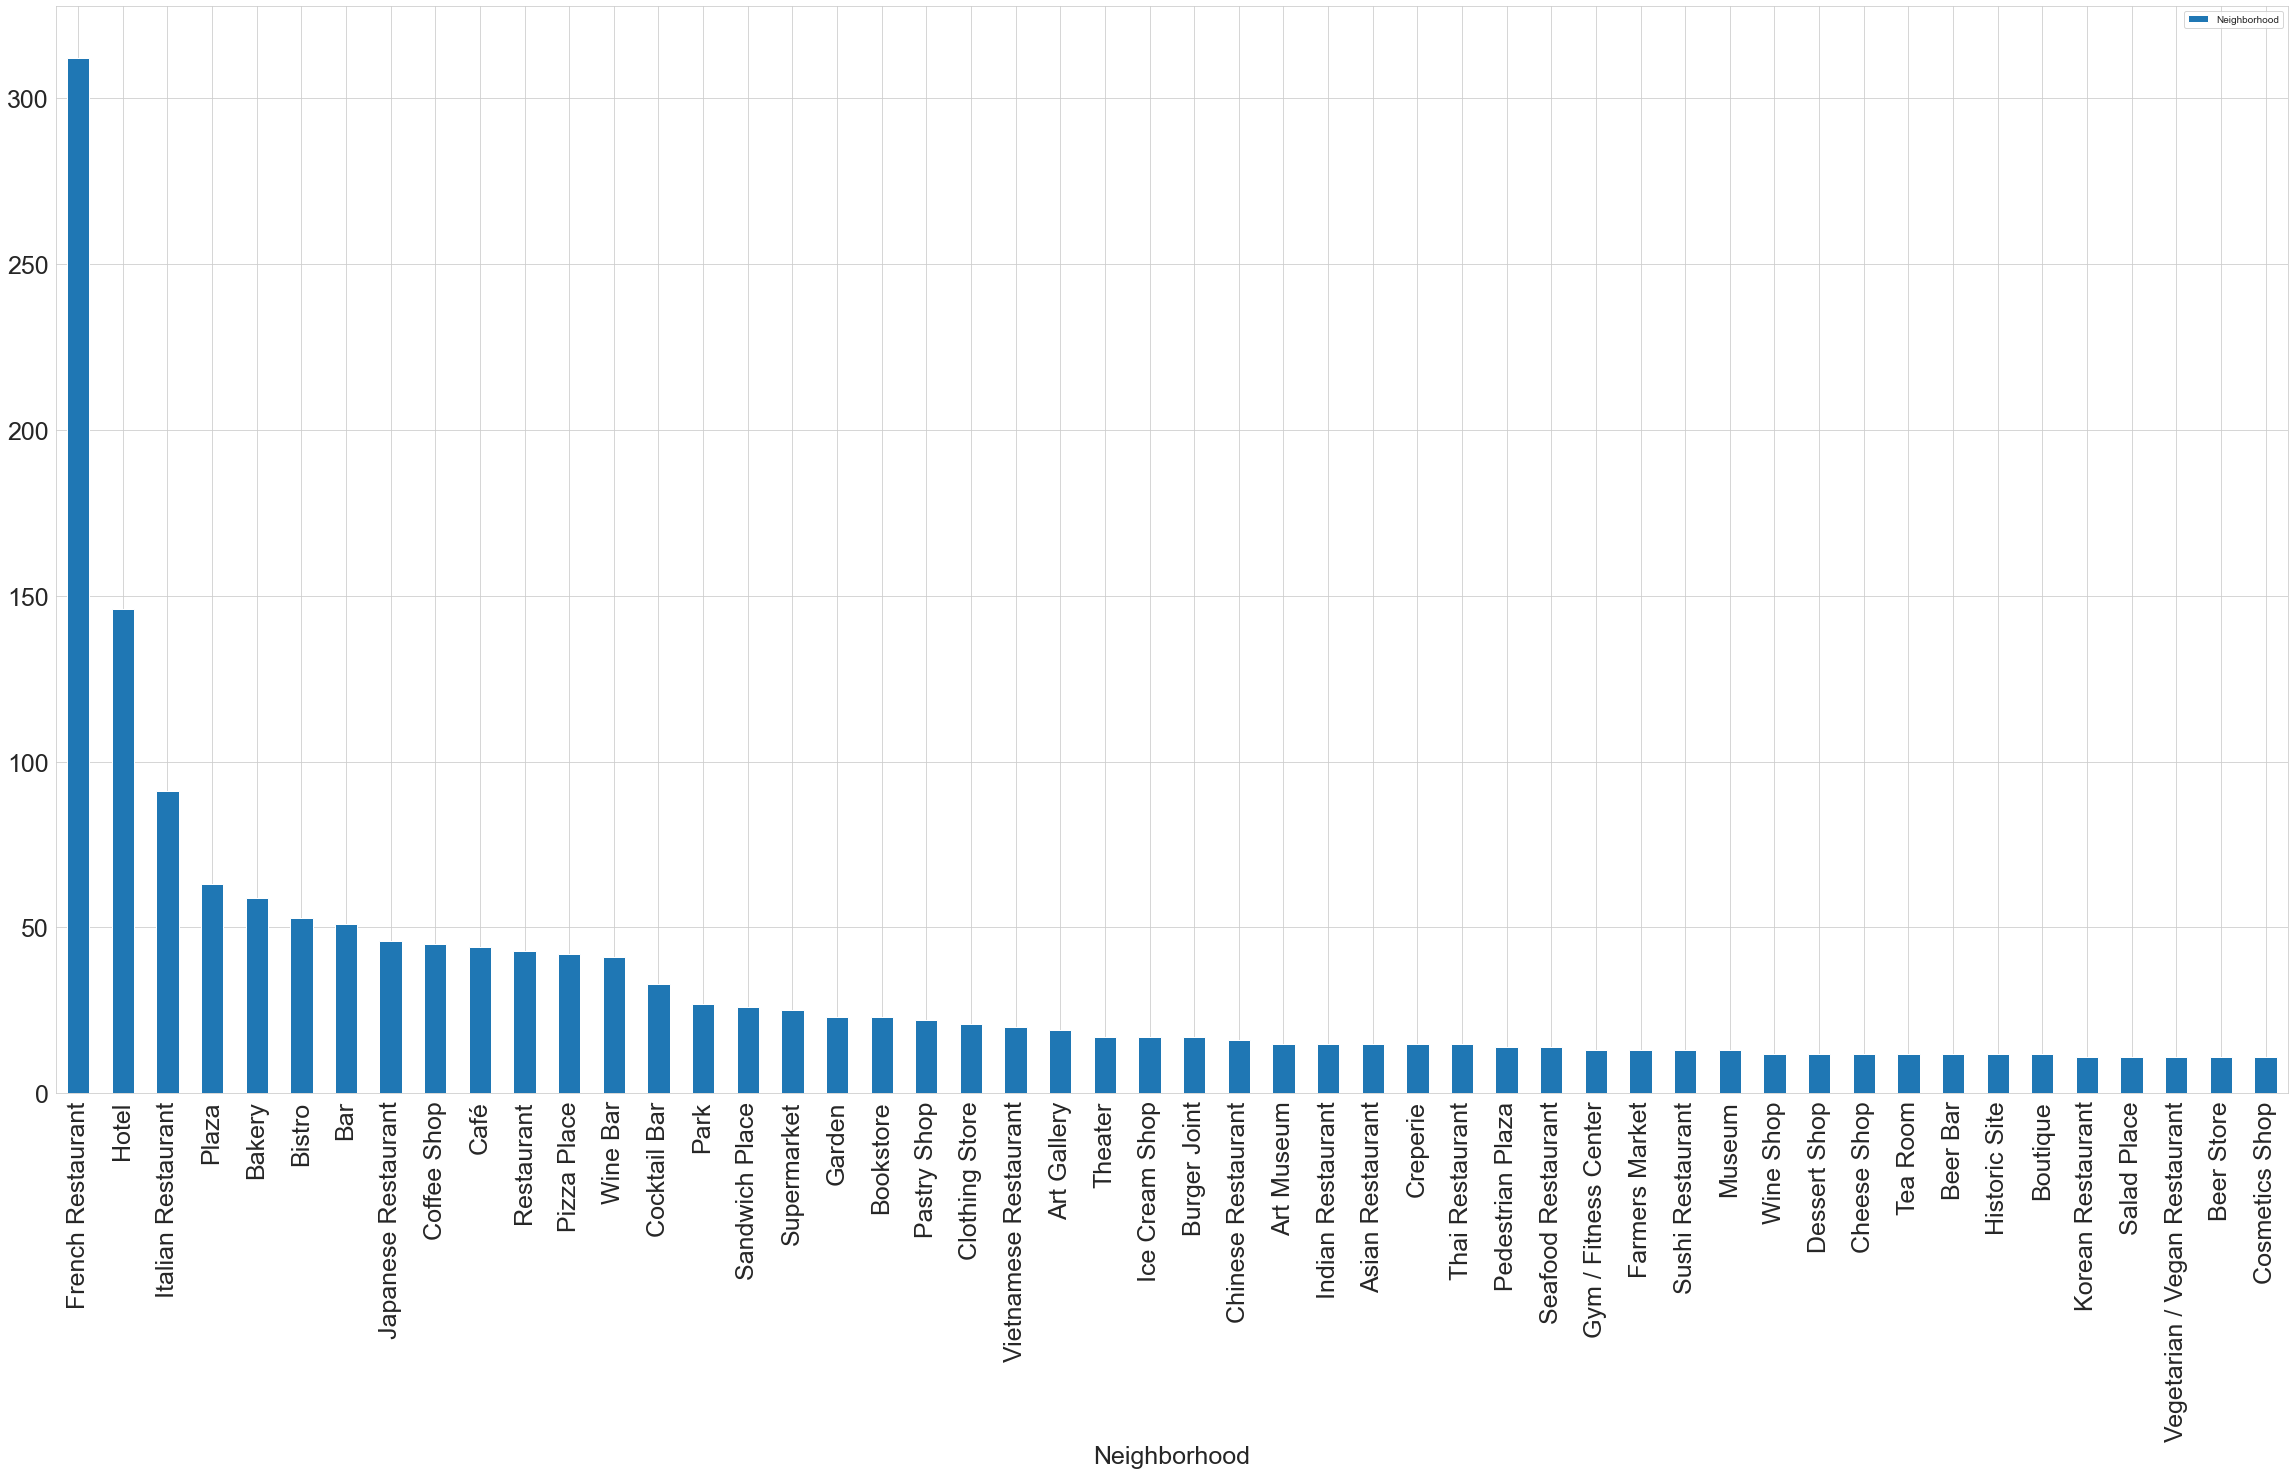

In [17]:
import seaborn as sns
sns.set_style("whitegrid")
figure=plt.figure(figsize=(30,20))
df_categ_grouped[df_categ_grouped['Neighborhood']>10].plot.bar(x='Venue Category',y='Neighborhood',figsize=(40,20))
plt.xlabel("Neighborhood",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

 - **Top 10 Category show that the most Paris have  à lot of restaurant, Hotel, Bar**

In [18]:
df_categ_grouped[df_categ_grouped['Neighborhood']>10][['Venue Category','Neighborhood']].head(10)

Venue Category  Neighborhood
90     French Restaurant           312
113                Hotel           146
119   Italian Restaurant            91
175                Plaza            63
16                Bakery            59
25                Bistro            53
17                   Bar            51
120  Japanese Restaurant            46
54           Coffee Shop            45
41                  Café            44

In [19]:
paris_venues=paris_venues[paris_venues['Venue Category']!='French Restaurant']

### 3.3- Analyze Each Neighborhood

- **making one hot coding to prepare deta for clusturing**

In [20]:
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

Neighborhood  Accessories Store  Afghan Restaurant  African Restaurant  \
0         Monnaie                  0                  0                   0   
1         Monnaie                  0                  0                   0   
3         Monnaie                  0                  0                   0   
4         Monnaie                  0                  0                   0   
5         Monnaie                  0                  0                   0   
...           ...                ...                ...                 ...   
2183       Halles                  0                  0                   0   
2185       Halles                  0                  0                   0   
2186       Halles                  0                  0                   0   
2187       Halles                  0                  0                   0   
2188       Halles                  0                  0                   0   

      Alsatian Restaurant  American Restaurant  Antique Shop  \
0                       0                    0             0   
1                       0                    0             0   
3                       0                    0             0   
4                       0                    0             0   
5                       0                    0             0   
...                   ...                  ...           ...   
2183                    0                    0             0   
2185                    0                    0             0   
2186                    0                    0             0   
2187                    0                    0             0   
2188                    0                    0             0   

      Arepa Restaurant  Argentinian Restaurant  Art Gallery  ...  \
0                    0                       0            0  ...   
1                    0                       0            0  ...   
3                    0                       0            0  ...   
4                    0                       0            0  ...   
5                    0                       0            0  ...   
...                ...                     ...          ...  ...   
2183                 0                       0            0  ...   
2185                 0                       0            0  ...   
2186                 0                       0            0  ...   
2187                 0                       0            0  ...   
2188                 0                       0            1  ...   

      Turkish Restaurant  Udon Restaurant  Vegetarian / Vegan Restaurant  \
0                      0                0                              0   
1                      0                0                              0   
3                      0                0                              0   
4                      0                0                              0   
5                      0                0                              0   
...                  ...              ...                            ...   
2183                   0                0                              0   
2185                   0                0                              0   
2186                   0                0                              0   
2187                   0                0                              0   
2188                   0                0                              0   

      Video Game Store  Vietnamese Restaurant  Wine Bar  Wine Shop  \
0                    0                      0         1          0   
1                    0                      0         0          0   
3                    0                      0         0          0   
4                    0                      0         0          0   
5                    0                      0         0          0   
...                ...                    ...       ...        ...   
2183                 0                      0         0          0 

#### group rows by neighborhood and by taking the mean of the frequency of occurrence of each category:


In [65]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

Neighborhood  Accessories Store  Afghan Restaurant  African Restaurant  \
0          Amérique                0.0                0.0                 0.0   
1          Archives                0.0                0.0                 0.0   
2           Arsenal                0.0                0.0                 0.0   
3   Arts-et-Métiers                0.0                0.0                 0.0   
4           Auteuil                0.0                0.0                 0.0   
..              ...                ...                ...                 ...   
75         Sorbonne                0.0                0.0                 0.0   
76           Ternes                0.0                0.0                 0.0   
77     Val-de-Grâce                0.0                0.0                 0.0   
78         Villette                0.0                0.0                 0.0   
79         Vivienne                0.0                0.0                 0.0   

    Alsatian Restaurant  American Restaurant  Antique Shop  Arepa Restaurant  \
0                   0.0             0.000000           0.0               0.0   
1                   0.0             0.000000           0.0               0.0   
2                   0.0             0.000000           0.0               0.0   
3                   0.0             0.000000           0.0               0.0   
4                   0.0             0.000000           0.0               0.0   
..                  ...                  ...           ...               ...   
75                  0.0             0.000000           0.0               0.0   
76                  0.0             0.041667           0.0               0.0   
77                  0.0             0.000000           0.0               0.0   
78                  0.0             0.000000           0.0               0.0   
79                  0.0             0.000000           0.0               0.0   

    Argentinian Restaurant  Art Gallery  ...  Turkish Restaurant  \
0                 0.000000     0.000000  ...            0.000000   
1                 0.000000     0.100000  ...            0.000000   
2                 0.000000     0.000000  ...            0.000000   
3                 0.038462     0.038462  ...            0.000000   
4                 0.000000     0.000000  ...            0.000000   
..                     ...          ...  ...                 ...   
75                0.000000     0.000000  ...            0.000000   
76                0.000000     0.000000  ...            0.000000   
77                0.000000     0.000000  ...            0.038462   
78                0.000000     0.000000  ...            0.000000   
79                0.000000     0.000000  ...            0.000000   

    Udon Restaurant  Vegetarian / Vegan Restaurant  Video Game Store  \
0               0.0                       0.000000               0.0   
1               0.0                       0.000000               0.0   
2               0.0                       0.041667               0.0   
3               0.0                       0.038462               0.0   
4               0.0                       0.000000               0.0   
..              ...                            ...               ...   
75              0.0                       0.000000               0.0   
76              0.0                       0.000000               0.0   
77              0.0                       0.000000               0.0   
78              0.0                       0.000000               0.0   
79              0.0                       0.000000               0.0   

    Vietnamese Restaurant  Wine Bar  Wine Shop  Women's Store  Yoga Studio  \
0                0.000000  0.000000   0.000000            0.0          0.0   
1                0.000000  0.000000   0.000000            0.0          0.0   
2                0.000000  0.041667   0.000000            0.0          0.0   
3                0.115385  0.000000   0.000000            0.0          0.0   
4

#### top 5 most common venues for each Neighborhood : 

In [66]:
num_top_venues = 5

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amérique----
             venue  freq
0      Supermarket  0.22
1             Park  0.11
2             Café  0.11
3  Bed & Breakfast  0.11
4             Pool  0.11


----Archives----
                     venue  freq
0           Clothing Store  0.13
1              Art Gallery  0.10
2  Scandinavian Restaurant  0.03
3        Health Food Store  0.03
4              Coffee Shop  0.03


----Arsenal----
                venue  freq
0               Plaza  0.08
1  Italian Restaurant  0.08
2       Boat or Ferry  0.08
3        Cocktail Bar  0.08
4    Pedestrian Plaza  0.04


----Arts-et-Métiers----
                   venue  freq
0  Vietnamese Restaurant  0.12
1                 Bakery  0.08
2             Restaurant  0.08
3     Chinese Restaurant  0.08
4     Italian Restaurant  0.08


----Auteuil----
                   venue  freq
0           Tennis Court  0.31
1                Stadium  0.19
2                 Garden  0.12
3  Outdoors & Recreation  0.06
4                 Office  0.06


----Batignol

                venue  freq
0        Cocktail Bar  0.11
1         Pastry Shop  0.07
2              Bistro  0.07
3                 Bar  0.07
4  Italian Restaurant  0.07


----Saint-Ambroise----
                     venue  freq
0               Restaurant  0.13
1                   Bakery  0.09
2       Mexican Restaurant  0.09
3              Pizza Place  0.04
4  Comfort Food Restaurant  0.04


----Saint-Fargeau----
                    venue  freq
0             Supermarket  0.22
1                  Bakery  0.11
2                   Plaza  0.11
3  Furniture / Home Store  0.11
4                   Diner  0.11


----Saint-Georges----
                     venue  freq
0       Italian Restaurant  0.20
1                    Hotel  0.16
2                     Café  0.04
3  Scandinavian Restaurant  0.04
4               Taco Place  0.04


----Saint-Germain-des-Prés----
                venue  freq
0               Hotel  0.11
1               Plaza  0.11
2                Café  0.07
3  Italian Restaurant  0.0

## 4- Cluster Neighborhoods

### 4.1- most commun venues by Neighborhood

- determine the 4 top venues for each categorie 

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
num_top_venues = 4

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.shape

(80, 5)

### 4.2- Clustering

In [64]:
# set number of clusters
kclusters = 10

paris_grouped_clustering = paris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 4, 1, 2, 1, 2, 1, 8, 2, 7])

In [69]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged = paris_venues

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

paris_merged.head() # check the last columns!

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Monnaie              48.854384                2.340035   
1      Monnaie              48.854384                2.340035   
3      Monnaie              48.854384                2.340035   
4      Monnaie              48.854384                2.340035   
5      Monnaie              48.854384                2.340035   

                        Venue  Venue Latitude  Venue Longitude  \
0                   Chez Nous       48.855823         2.340271   
1            Chez Le Libanais       48.853285         2.341673   
3               Taschen Store       48.853750         2.338162   
4          Ze Kitchen Galerie       48.855101         2.341297   
5  Prescription Cocktail Club       48.854921         2.337768   

        Venue Category  Cluster Labels 1st Most Common Venue  \
0             Wine Bar               5                 Plaza   
1  Lebanese Restaurant               5                 Plaza   
3            Bookstore               5                 Plaza   
4           Restaurant               5                 Plaza   
5         Cocktail Bar               5                 Plaza   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  
0        Sandwich Place              Wine Bar          Cocktail Bar  
1        Sandwich Place              Wine Bar          Cocktail Bar  
3        Sandwich Place              Wine Bar          Cocktail Bar  
4        Sandwich Place              Wine Bar          Cocktail Bar  
5        Sandwich Place              Wine Bar          Cocktail Bar

### 4.3- Map clusters

In [72]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Venue Latitude'], paris_merged['Venue Longitude'],paris_merged['Neighborhood'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5- Clusters analyses

### 5.1- cluster 1

In [70]:
cluster1=paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster1.describe(include=[object])  

Venue Category 1st Most Common Venue 2nd Most Common Venue  \
count             165                   165                   165   
unique             74                     2                     7   
top             Hotel                 Hotel             Hotel Bar   
freq               40                   139                    27   

       3rd Most Common Venue 4th Most Common Venue  
count                    165                   165  
unique                     7                     7  
top                 Boutique           Pastry Shop  
freq                      27                    27

**Conclusions :**
- contains 206 hotels and 54 shops


### 5.2- cluster 2

In [71]:
cluster2=paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster2.describe(include=[object])  

Venue Category 1st Most Common Venue 2nd Most Common Venue  \
count             311                   311                   311   
unique            122                    14                    17   
top       Supermarket           Supermarket                 Hotel   
freq               16                    62                    29   

       3rd Most Common Venue   4th Most Common Venue  
count                    311                     311  
unique                    17                      16  
top                      Bar  Furniture / Home Store  
freq                      29                      32

**Conclusions :**
- contains 78 Supermarket and 29 hotels and 29 bars

### 5.3- cluster 3

In [31]:
cluster3=paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster3.describe(include=[object])  

Venue Category 1st Most Common Venue 2nd Most Common Venue  \
count             289                   289                   289   
unique             99                     7                     9   
top               Bar                   Bar                   Bar   
freq               32                   125                    82   

       3rd Most Common Venue 4th Most Common Venue  
count                    289                   289  
unique                     8                     9  
top              Pizza Place                   Bar  
freq                      76                    54

**Conclusions :**
- contains 293 bars and 76 Pizza Place

### 5.4- cluster 4

In [32]:
cluster4=paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster4.describe(include=[object]) 

Venue Category 1st Most Common Venue 2nd Most Common Venue  \
count             803                   803                   803   
unique            189                    25                    26   
top             Hotel           Coffee Shop              Wine Bar   
freq               28                    84                    87   

       3rd Most Common Venue 4th Most Common Venue  
count                    803                   803  
unique                    28                    29  
top                    Hotel                  Park  
freq                      55                    61

**Conclusions :**
- contains 83 hotels and 84 coffee shop and 87 wine bars 61 parks

### 5.5- cluster 5

In [73]:
cluster5=paris_merged.loc[paris_merged['Cluster Labels'] == 4, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster5.describe(include=[object]) 

Venue Category 1st Most Common Venue 2nd Most Common Venue  \
count             304                   304                   304   
unique             99                     7                    10   
top       Coffee Shop           Coffee Shop              Wine Bar   
freq               22                    84                    58   

          3rd Most Common Venue 4th Most Common Venue  
count                       304                   304  
unique                       11                    10  
top     Scandinavian Restaurant           Coffee Shop  
freq                         30                    52

**Conclusions :**
- contains 158 coffee shop and 58 wine bars

### 5.6- cluster 6

In [79]:
cluster6=paris_merged.loc[paris_merged['Cluster Labels'] == 5, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster6.describe(include=[object]) 

Venue Category 1st Most Common Venue 2nd Most Common Venue  \
count             258                   258                   258   
unique             86                     6                     7   
top             Plaza                 Plaza                 Hotel   
freq               28                   134                    76   

       3rd Most Common Venue 4th Most Common Venue  
count                    258                   258  
unique                     8                     8  
top                     Café                 Plaza  
freq                      57                    70

**Conclusions :**
- contains 232 plaza 76 hotels, 57 cafés

### 5.7- cluster 7

In [81]:
cluster7=paris_merged.loc[paris_merged['Cluster Labels'] == 6, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster7.describe(include=[object]) 

Venue Category 1st Most Common Venue 2nd Most Common Venue  \
count                  141                   141                   141   
unique                  60                     3                     2   
top     Italian Restaurant    Italian Restaurant                 Hotel   
freq                    25                    69                    94   

       3rd Most Common Venue 4th Most Common Venue  
count                    141                   141  
unique                     6                     5  
top                   Bistro                 Plaza  
freq                      25                    49

**Conclusions :**
- contains 94 italian restaurant 94 hotels and 49 plaza 

### 5.8- cluster 8

In [82]:
cluster8=paris_merged.loc[paris_merged['Cluster Labels'] == 7, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster8.describe(include=[object]) 

Venue Category 1st Most Common Venue 2nd Most Common Venue  \
count              86                    86                    86   
unique             47                     2                     3   
top      Cocktail Bar          Cocktail Bar                 Hotel   
freq                8                    57                    29   

       3rd Most Common Venue 4th Most Common Venue  
count                     86                    86  
unique                     3                     3  
top             Cocktail Bar       Thai Restaurant  
freq                      29                    29

**Conclusions :**
- contains 94 cocktail bar 29 hotel and 29 thai restaurant.

### 5.9- cluster 9

In [83]:
cluster9=paris_merged.loc[paris_merged['Cluster Labels'] == 8, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster9.describe(include=[object]) 

Venue Category 1st Most Common Venue 2nd Most Common Venue  \
count             181                   181                   181   
unique             80                     3                     7   
top               Bar                   Bar                   Bar   
freq               23                   125                    28   

       3rd Most Common Venue 4th Most Common Venue  
count                    181                   181  
unique                     5                     7  
top              Pizza Place             Brasserie  
freq                      76                    28

**Conclusions :**
- contains 204 bars and 76 pizza place

### 5.10- cluster 10

In [78]:
cluster10=paris_merged.loc[paris_merged['Cluster Labels'] == 9, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]
cluster10.describe(include=[object]) 

Venue Category 1st Most Common Venue 2nd Most Common Venue  \
count              28                    28                    28   
unique             20                     1                     1   
top            Garden                Garden        Science Museum   
freq                4                    28                    28   

       3rd Most Common Venue 4th Most Common Venue  
count                     28                    28  
unique                     1                     1  
top                   Museum      Botanical Garden  
freq                      28                    28

**Conclusions :**
- contains 59 garden and 56 meseum

## 6-Conclusions

 - For hotels we choose clusters 1,4,6,7.
 - For meseum and garden we choose cluster 10.
 - For plaza we chosse cluster 6.
 - For bar we choose clusters 3,5,8,9.